In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" *user *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\bifurcation\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation`


In [2]:
using BifurcationKit, LinearAlgebra, Plots, Parameters, JLD2
const BK = BifurcationKit

BifurcationKit

In [3]:
τ_ = 0.013; τD_ = 0.07993;  τy_ = 3.3; J_ = 3.07; β_ = 0.300
xthr_ = 0.75; ythr_ = 0.4
α_ = 1.58; ΔU0_ = 0.305
I0_ = -1.7064; U0_ = 0.265; 

@inbounds function TM_bk!(du, u, p, t = 0)
    U_ = p[8] + p[9] / ( 1.0 + exp( -50.0 * (u[3] - p[7]) ) )
    σ = 1.0 / ( 1.0 + exp( -20.0 * (u[2]-p[6]) ) )
    g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )
    
    du[1] = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du[2] = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du[3] = (-u[3])/p[4] + p[10] * σ
    
    return du
end

TM_bk! (generic function with 2 methods)

In [4]:
TM_bk(u, p) = TM_bk!(similar(u), u, p, 0)

p_tm = (α = α_, τ = τ_, τD = τD_, τy = τy_, J = J_, xthr = xthr_, ythr = ythr_, U0 = U0_, ΔU0 = ΔU0_, β = β_, I0 = I0_)
fp0 = [ 8.34581,  0.738495,  0.438299];

prob =  BifurcationProblem(TM_bk, fp0, p_tm, (@lens _.I0))

opt_new = NewtonPar(maxIter = 3, tol = 1e-6)
pmax, pmin = 0.0, -1.74

opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-5, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 300, nInversion = 6)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-5
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 -1.74
  pMax: Float64 0.0
  maxSteps: Int64 300
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 6
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


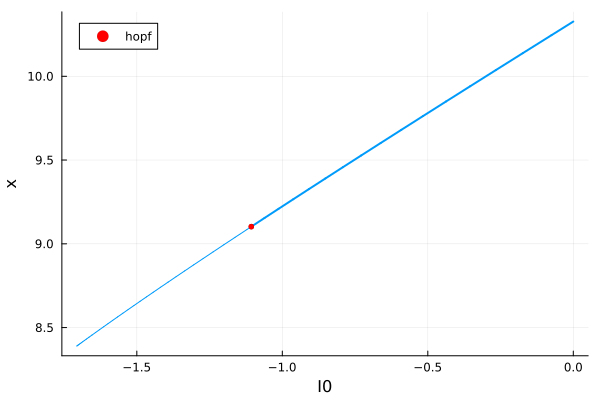

In [5]:
br = continuation(prob, PALC(), opts_con)

plot(br)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━


──▶ convergence of initial guess = OK

──▶ parameter = 0.265, initial step



━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 0.26500666666666667, initial step (bis)


Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter 

U0 = 2.6500e-01 ⟶  2.6508e-01 [guess]


──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0

 = 2.6500e-01 ⟶  2.6508e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.201638308453745, -0.1554443903466805, 0)
              ──> (16.204670354929423, -0.15536291725154225, 0)


───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter U0 = 2.6508e-01 ⟶  2.6517e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6508e-01 ⟶  2.6517e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.204670354929423, -0.15536291725154225, 0)
              ──> (16.20837571399167, -0.1552634966422905, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 1.4938e-03
Parameter U0 = 2.6517e-01 ⟶  2.6528e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6517e-01 ⟶  2.6528e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.20837571399167, -0.1552634966422905, 0)
              ──> (16.212904334887664, -0.15514209987500982, 0)
───────────────────────────────────────────────────────
Continuation Step 3 
Step size = 1.8258e-03
Parameter U0 = 2.6528e-0

Step size = 1.6861e-02
Parameter U0 = 2.7515e-01 ⟶  2.7682e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.7515e-01 ⟶  2.7690e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.551670832978427, -0.146361112934238, 0)
              ──> (16.602593124241896, -0.1450798681251697, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = 1.7797e-02
Parameter U0 = 2.7690e-01 ⟶  2.7875e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.7690e-01 ⟶  2.7884e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.602593124241896, -0.1450798681251697, 0)
              ──> (16.65630484652338, -0.14373425023033737, 0)
───────────────────────────────────────────────────────
Continuation Step 19 
Step size = 1.8786e-02
Parameter U0 = 2.7884e-01 ⟶  2.8089e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Param

Parameter U0 = 2.8101e-01 ⟶  2.8344e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.712951411864417, -0.14231869995337892, 0)
              ──> (16.77268283429139, -0.14082602193677074, 0)
───────────────────────────────────────────────────────
Continuation Step 21 
Step size = 2.0932e-02
Parameter U0 = 2.8344e-01 ⟶  2.8601e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.8344e-01 ⟶  2.8620e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.77268283429139, -0.14082602193677074, 0)
              ──> (16.83565209119447, -0.139246534744283, 0)
───────────────────────────────────────────────────────
Continuation Step 22 
Step size = 2.2094e-02
Parameter U0 = 2.8620e-01 ⟶  2.8911e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.8620e-01 ⟶  2.8935e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Ev

──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.363743511505614, -0.11759085679477477, 0)
              ──> (17.35447270811856, -0.11657954832219306, 0)
───────────────────────────────────────────────────────
Continuation Step 34 
Step size = 4.4929e-03
Parameter U0 = 3.5378e-01 ⟶  3.5779e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.5378e-01 ⟶  3.5719e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.35447270811856, -0.11657954832219306, 0)
              ──> (17.343466785225264, -0.11571418762805533, 0)
───────────────────────────────────────────────────────
Continuation Step 35 
Step size = 4.7425e-03
Parameter U0 = 3.5719e-01 ⟶  3.6075e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.5719e-01 ⟶  3.6029e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.343466785225264, -0.1

───────────────────────────────────────────────────────
Continuation Step 40 
Step size = 6.2145e-03
Parameter U0 = 3.7119e-01 ⟶  3.7392e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.7119e-01 ⟶  3.7373e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.27037257338063, -0.11211514706040873, 0)
              ──> (17.252465543579135, -0.11144194173687219, 0)
───────────────────────────────────────────────────────
Continuation Step 41 
Step size = 6.5598e-03
Parameter U0 = 3.7373e-01 ⟶  3.7641e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.7373e-01 ⟶  3.7624e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.252465543579135, -0.11144194173687219, 0)
              ──> (17.23342555998441, -0.11076807386167362, 0)
───────────────────────────────────────────────────────
Continuation Step 42 
Step size = 6.9242e-03
Parameter U0 = 3.76

U0 = 3.8874e-01 ⟶  3.9140e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.8874e-01 ⟶  3.9128e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.119514649773038, -0.10725176418847004, 0)
              ──> (17.092561442639308, -0.10649546231789889, 0)
───────────────────────────────────────────────────────
Continuation Step 48 
Step size = 9.5776e-03
Parameter U0 = 3.9128e-01 ⟶  3.9397e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.9128e-01 ⟶  3.9385e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.092561442639308, -0.10649546231789889, 0)
              ──> (17.064049969225, -0.10571392235391769, 0)
───────────────────────────────────────────────────────
Continuation Step 49 
Step size = 1.0110e-02
Parameter U0 = 3.9385e-01 ⟶  3.9656e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.9385e-01 ⟶  3.9645e

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━
──▶ convergence of initial guess = OK

──▶ parameter = 0.265, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 0.26499333333333336, initial step (bis)
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 0 
Step size = -1.0000e-03
Parameter U0 = 2.6500e-01 ⟶  2.6492e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6500e-01 ⟶  2.6492e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.201638308453745, -0.1554443903466805, 0)
              ──> (16.19860675805195, -0.15552579392972796, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = -1.2222e-03
Parameter U0 = 2.6492e-01 ⟶  2.6483e-01 [guess]
──> Step

Step size = -4.0743e-03
Parameter U0 = 2.6396e-01 ⟶  2.6366e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6396e-01 ⟶  2.6366e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.159689160732153, -0.15657661341265694, 0)
              ──> (16.14733217227445, -0.15691227375071531, 0)
───────────────────────────────────────────────────────
Continuation Step 8 
Step size = -4.9797e-03
Parameter U0 = 2.6366e-01 ⟶  2.6329e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6366e-01 ⟶  2.6330e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.14733217227445, -0.15691227375071531, 0)
              ──> (16.132227603784564, -0.15732391146708324, 0)
───────────────────────────────────────────────────────
Continuation Step 9 
Step size = -6.0863e-03
Parameter U0 = 2.6330e-01 ⟶  2.6285e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
P

──> Event values: (15.811497877356635, -0.16644829608343287, 0)
              ──> (15.742765428672016, -0.16850795782194533, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = -2.3861e-02
Parameter U0 = 2.5513e-01 ⟶  2.5376e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.5513e-01 ⟶  2.5382e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (15.742765428672016, -0.16850795782194533, 0)
              ──> (15.670185203639747, -0.17072634416324017, 0)
───────────────────────────────────────────────────────
Continuation Step 19 
Step size = -2.5187e-02
Parameter U0 = 2.5382e-01 ⟶  2.5244e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.5382e-01 ⟶  2.5250e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (15.670185203639747, -0.17072634416324017, 0)
              ──> (15.593541298860375, -0.1731189475

───────────────────────────────────────────────────────
Continuation Step 34 
Step size = -1.0000e-01
Parameter U0 = 2.2995e-01 ⟶  2.2884e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2995e-01 ⟶  2.2904e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (12.90674889875189, -0.2922544787492216, 0)
              ──> (12.599440694971662, -0.3075144648782353, 0)
───────────────────────────────────────────────────────
Continuation Step 35 
Step size = -1.0000e-01
Parameter U0 = 2.2904e-01 ⟶  2.2812e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2904e-01 ⟶  2.2828e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (12.599440694971662, -0.3075144648782353, 0)
              ──> (12.292027572154783, -0.320753566246586, 0)
───────────────────────────────────────────────────────
Continuation Step 36 
Step size = -1.0000e-01
Parameter U0 = 2.282

Step size = -1.0000e-01
Parameter U0 = 2.2637e-01 ⟶  2.2573e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.2637e-01 ⟶  2.2560e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (11.370449205445858, -0.321125424611669, 0)
              ──> (11.064372659993323, -0.28908545975815664, 0)
───────────────────────────────────────────────────────
Continuation Step 40 
Step size = -1.0000e-01
Parameter U0 = 2.2560e-01 ⟶  2.2482e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.2560e-01 ⟶  2.2457e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (11.064372659993323, -0.28908545975815664, 0)
              ──> (10.759804732785213, -0.22341334640319122, 0)
───────────────────────────────────────────────────────
Continuation Step 41 
Step size = -1.0000e-01
Parameter U0 = 2.2457e-01 ⟶  2.2354e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)

((2, 0), (1, 0))
────> [Bisection] initial ds = -0.1
────> [Bisection] state.ds = 0.1
──> eve (initial) (10.457819856800302, -0.1136558631022988, 0) ──> (10.15958472464819, 0.02916116952953407, 0)



──> eigvals = 
-1.363828477929374e-7 - 10.159584797372556im
-1.363828477929374e-7 + 10.159584797372556im
-0.4328867344594442 + 0.0im

────> eve (current) (10.15958472464819, 0.02916116952953407, 0) ──> (10.15958472464819, 0.02916116952953407, 0)
────> eigvals = 
-1.363828477929374e-7 - 10.159584797372556im
-1.363828477929374e-7 + 10.159584797372556im


-0.4328867344594442 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = 0.05, p = 0.22121769599317634, #reverse = 0
────> event ∈ (0.22121769599317634, 0.22313517368663638), precision = 1.917E-03
Predictor:  Secant

────> eve (current) (10.15958472464819, 0.02916116952953407, 0) ──> (10.308009624783864, -0.044118089360172086, 0)
────> eigvals = 
-5.7586602153492095e-11 - 10.308009624809888im
-5.7586602153492095e-11 + 10.308009624809888im
-0.4901597156240403 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (2, 0))
			ds = -0.025, p = 0.22223638812307098, #reverse = 1
────> event ∈ (0.22121769599317634, 0.22223638812307098), precision = 1.019E-03
Predictor:  Secant

────> eve (current) (10.308009624783864, -0.044118089360172086, 0) ──> (10.23367192737185, -0.007569391075105125, 0)
────> eigvals = 
-9.703349235223868e-14 - 10.23367192737191im
-9.703349235223868e-14 + 10.23367192737191im
-0.4595221112571246 + 0.0im
────> 2 - [Bisection] 

────> Found at p = 0.22163354833461535 ∈ (0.22163354833461535, 0.22163757748651672), 
			  δn = (1, 0), from p = 0.22121769599317634
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = false
──────> n_inversion >= nInversion = true
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.22163354833461535 
───────────────────────────────────────────────────────
Continuation Step 43 
Step size = -1.0000e-01
Parameter U0 = 2.2163e-01 ⟶  2.1957e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2163e-01 ⟶  2.1937e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (10.218023776753865, 0.00019210613553760636, 0)
              ──> (9.923290577719259, 0.13867551104444753, 0)
───────────────────────────────────────────────────────
Continuation Step 4

U0 = 1.9126e-01 ⟶  1.8975e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.9126e-01 ⟶  1.8986e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (6.099360978096244, 0.5048746227769529, 0)
              ──> (5.798330432807205, 0.5323760321510023, 0)
───────────────────────────────────────────────────────
Continuation Step 58 
Step size = -1.0000e-01
Parameter U0 = 1.8986e-01 ⟶  1.8847e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8986e-01 ⟶  1.8858e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (5.798330432807205, 0.5323760321510023, 0)
              ──> (5.496154705355952, 0.5642065509961447, 0)
───────────────────────────────────────────────────────
Continuation Step 59 
Step size = -1.0000e-01
Parameter U0 = 1.8858e-01 ⟶  1.8729e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8858e-01 ⟶  1.8740e-01
──>

──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8030e-01 ⟶  1.8014e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (1.471649669093492, 4.735160392390753, 0)
              ──> (1.1563535955899389, 7.548927733796724, 0)
───────────────────────────────────────────────────────
Continuation Step 73 
Step size = -1.0000e-01
Parameter U0 = 1.8014e-01 ⟶  1.7997e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8014e-01 ⟶  1.8002e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (1.1563535955899389, 7.548927733796724, 0)
              ──> (0.840643594623405, 14.113851253764608, 0)
───────────────────────────────────────────────────────
Continuation Step 74 
Step size = -1.0000e-01
Parameter U0 = 1.8002e-01 ⟶  1.7990e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8002e-01 ⟶  1.7994e-01
──> Computed 3 eigenvalues in 1 iterations


!! Continuous user point at p ≈ 0.1798874870608784 


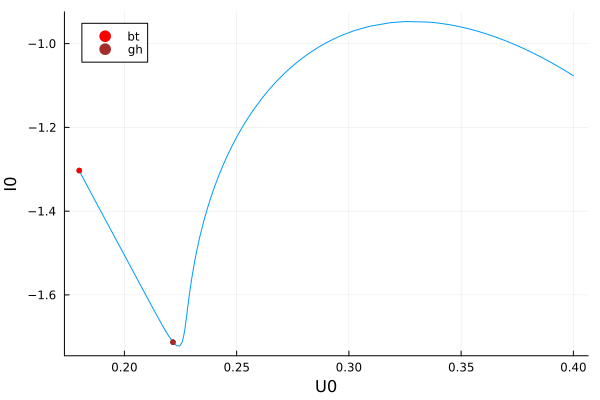

In [6]:
hp_codim2_1 = continuation(br, 1, (@lens _.U0),
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.4,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )
plot(hp_codim2_1)

In [7]:
hp_codim2_1

 ┌─ Curve type: HopfCont
 ├─ Number of points: 131
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.1798874870608784, ends at 0.4
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.17988749,                                                                     step =   0
- #  2,       bt at U0 ≈ +0.17988749 ∈ (+0.17988744, +0.17988749), |δp|=5e-08, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
- #  3,       gh at U0 ≈ +0.22163355 ∈ (+0.22163355, +0.22163758), |δp|=4e-06, [converged], δ = ( 0,  0), step =  34, eigenelements in eig[ 35], ind_ev =   0
- #  4, endpoint at U0 ≈ +0.40000000,                                                                     step = 130


In [18]:
hp_codim2_1[35]

(I0 = -1.712846288235767, U0 = 0.22163354833461535, ωₕ = 10.218023776753865, l1 = 0.00019210613553760636 + 0.9709559404215089im, BT = 10.218023776753865, GH = 0.00019210613553760636, x = 7.691841580090067, param = 0.22163354833461535, itnewton = 2, itlinear = 4, ds = -0.1, n_unstable = 0, n_imag = 0, stable = true, step = 34, eigenvals = ComplexF64[-2.1087650292628268e-8 - 10.218023721367148im, -2.1087650292628268e-8 + 10.218023721367148im, -0.4535777434351986 + 0.0im], eigenvecs = ComplexF64[-0.9997853500528465 - 0.0im -0.9997853500528465 + 0.0im 0.9654764021378872 + 0.0im; 0.01744756834163887 + 0.010764432236282262im 0.01744756834163887 - 0.010764432236282262im -0.026136904846498648 + 0.0im; -0.0014957600985266272 + 0.0025934299737738805im -0.0014957600985266272 - 0.0025934299737738805im 0.25917596169383766 + 0.0im])

In [8]:
hp_codim2_1[1]

(I0 = -1.3029892787649975, U0 = 0.1798874870608784, ωₕ = -0.004099273561106481, l1 = 289.19292477792624 - 5.907819273647964e7im, BT = -0.004099273561106481, GH = 289.19292477792624, x = 5.150659211407544, param = 0.1798874870608784, itnewton = 2, itlinear = 4, ds = -0.1, n_unstable = 0, n_imag = 0, stable = true, step = 0, eigenvals = ComplexF64[-2.9036862215158724e-7 - 0.075219043021921im, -2.9036862215158724e-7 + 0.075219043021921im, -0.3030394313589299 + 0.0im], eigenvecs = ComplexF64[0.9974623108269425 - 0.0im 0.9974623108269425 + 0.0im -0.0004339308830098702 + 0.0im; -0.027105243591701363 - 0.00013645812571871533im -0.027105243591701363 + 0.00013645812571871533im 1.2037191804263925e-5 + 0.0im; -0.06381514169548913 - 0.016181882436080857im -0.06381514169548913 + 0.016181882436080857im -0.999999905779543 + 0.0im])

In [9]:
sn_codim2_1 = continuation(hp_codim2_1, 2,
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.4,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )

--> Considering bifurcation point:


- #  2,       bt at p ≈ +0.17988749 ∈ (+0.17988744, +0.17988749), |δp|=5e-08, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
──▶ Bogdanov-Takens Normal form computation
────▶ eigenvalues = 

ComplexF64[-2.9036862215158724e-7 - 0.075219043021921im, -2.9036862215158724e-7 + 0.075219043021921im]


┌ Warning: G == I(2) is not valid. We built a basis such that G = [0.9999986572266407 1.0842021724855044e-18; 8.250068551772866e-5 0.9999999999999999]
└ @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\codim2\NormalForms.jl:170


(a = -21.331957517236233, b = -0.8862097979717625)

┌ Warning: G is not close to the Jordan block of size 2. We built a basis such that G = [9.211229457798446e-5 1.0000000841090653; -0.005659426735690761 -5.1677041983329465e-6]. The norm of the difference is 0.005659426735690761
└ @ BifurcationKit C:\Users\Alex\.julia\packages\BifurcationKit\DlOaK\src\codim2\NormalForms.jl:173



━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────



━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━
──▶ convergence of initial guess = OK

──▶ parameter = 0.17990095552575788, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 0.17990762219242454, initial step (bis)


Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter U0 = 1.7990e-01 ⟶  1.7997e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0

 = 1.7990e-01 ⟶  1.7997e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (-3.1303820048102464e-6, 0.0723213738416465, 0)
              ──> (-1.8737549549465095e-5, 0.07237053521099406, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter U0 = 1.7997e-01 ⟶  1.8006e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7997e-01 ⟶  1.8006e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (-1.8737549549465095e-5, 0.07237053521099406, 0)
              ──> (-3.7789819978444546e-5, 0.07250211430983357, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 1.4938e-03
Parameter U0 = 1.8006e-01 ⟶  1.8017e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.8006e-01 ⟶  1.8017e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> 

──> Event values: (-0.0004485490087373349, 0.07534894166056863, 0)
              ──> (-0.0005606730485228593, 0.07612884030533927, 0)
───────────────────────────────────────────────────────
Continuation Step 11 
Step size = 9.0918e-03
Parameter U0 = 1.8261e-01 ⟶  1.8330e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.8261e-01 ⟶  1.8331e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (-0.0005606730485228593, 0.07612884030533927, 0)
              ──> (-0.0006965024348749192, 0.07707534780545419, 0)
───────────────────────────────────────────────────────
Continuation Step 12 
Step size = 1.1112e-02
Parameter U0 = 1.8331e-01 ⟶  1.8417e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.8331e-01 ⟶  1.8418e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (-0.0006965024348749192, 0.07707534780545419, 0)
              ──> (-0.00086073040649423

Predictor:  Secant
──> Event values: (-0.0049447603442072385, 0.10974118530076207, 0)
              ──> (-0.005335529641509647, 0.11293955914716576, 0)
───────────────────────────────────────────────────────
Continuation Step 27 
Step size = 3.8817e-02
Parameter U0 = 2.1963e-01 ⟶  2.2401e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.1963e-01 ⟶  2.2414e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.005335529641509647, 0.11293955914716576, 0)
              ──> (-0.005747418092269233, 0.11627740244306321, 0)
───────────────────────────────────────────────────────
Continuation Step 28 
Step size = 4.0974e-02
Parameter U0 = 2.2414e-01 ⟶  2.2891e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2414e-01 ⟶  2.2905e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.005747418092269233, 0.11627740244306321, 0)
              ──> (-0.00

──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.6531e-01 ⟶  2.8120e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.038608836294092966, 0.19294498120108763, 0)
              ──> (-0.08177412070113792, 0.2321018073520109, 0)
───────────────────────────────────────────────────────
Continuation Step 35 
Step size = 5.6675e-02
Parameter U0 = 2.8120e-01 ⟶  2.9435e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.8120e-01 ⟶  2.9459e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.08177412070113792, 0.2321018073520109, 0)
              ──> (-0.10368844969313591, 0.22186277432560025, 0)
───────────────────────────────────────────────────────
Continuation Step 36 
Step size = 5.6675e-02
Parameter U0 = 2.9459e-01 ⟶  3.0717e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.9459e-01 ⟶  3.0692e-01
──> Computed 3 eigenvalues i

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━
──▶ convergence of initial guess = OK

──▶ parameter = 0.17990095552575788, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 0.17989428885909123, initial step (bis)
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 0 
Step size = -1.0000e-03
Parameter U0 = 1.7990e-01 ⟶  1.7983e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7990e-01 ⟶  1.7983e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-3.1303820048102464e-6, 0.0723009121056377, 0)
              ──> (1.2493588896780882e-5, 0.07225171499586101, 0)
──> Event detected before p = 0.17982870380849
────> Entering [Event], indicator of 2 last events = ((2, 0), (1, 0))
────> [Bisection] in

Step size = -1.4938e-03
Parameter U0 = 1.7980e-01 ⟶  1.7969e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7980e-01 ⟶  1.7969e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (1.911894526282799e-5, 0.07221577393980311, 0)
              ──> (4.2501102764409536e-5, 0.07205335660804162, 0)
───────────────────────────────────────────────────────
Continuation Step 3 
Step size = -1.8258e-03
Parameter U0 = 1.7969e-01 ⟶  1.7956e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7969e-01 ⟶  1.7956e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (4.2501102764409536e-5, 0.07205335660804162, 0)
              ──> (7.11310259900267e-5, 0.07185586667495637, 0)


───────────────────────────────────────────────────────
Continuation Step 4 
Step size = -2.2315e-03
Parameter U0 = 1.7956e-01 ⟶  1.7940e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7956e-01 ⟶  1.7940e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (7.11310259900267e-5, 0.07185586667495637, 0)
              ──> (0.00010620063922898789, 0.07161404969822666, 0)
───────────────────────────────────────────────────────
Continuation Step 5 
Step size = -2.7274e-03
Parameter U0 = 1.7940e-01 ⟶  1.7920e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7940e-01 ⟶  1.7920e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.00010620063922898789, 0.07161404969822666, 0)
              ──> (0.0001491796300154103, 0.07131783456925686, 0)
───────────────────────────────────────────────────────
Continuation Step 6 
Step size = -3.3335e-03
Parameter

 = 1.7517e-01 ⟶  1.7410e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7517e-01 ⟶  1.7413e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.0011229482284510182, 0.0646433575831362, 0)
              ──> (0.0014053911923135412, 0.06271878988722626, 0)
───────────────────────────────────────────────────────
Continuation Step 15 
Step size = -2.0289e-02
Parameter U0 = 1.7413e-01 ⟶  1.7286e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.7413e-01 ⟶  1.7291e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.0014053911923135412, 0.06271878988722626, 0)
              ──> (0.0017578381726014761, 0.060322874244514275, 0)
───────────────────────────────────────────────────────
Continuation Step 16 
Step size = -2.1416e-02
Parameter U0 = 1.7291e-01 ⟶  1.7162e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.7291e-01

))
────> [Bisection] initial ds = -0.04325018581702812
────> [Bisection] state.ds = 0.04325018581702812
──> eve (initial) (0.009447453354776363, 0.0038436017201499565, 0) ──> (0.010586761703759093, -0.004768993783531225, 0)

──> eigvals = 
-1.1019673162252636e-10 + 0.0im
-0.3030302970944768 + 0.0im
-3.806609869514653 + 0.0im

────> eve (current) (0.010586761703759093, -0.004768993783531225, 0) ──> (0.010586761703759093, -0.004768993783531225, 0)
────> eigvals = 
-1.1019673162252636e-10 + 0.0im
-0.3030302970944768 + 0.0im
-3.806609869514653 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (1, 0))
			ds = 0.02162509290851406, p = 0.16191990156317088, #reverse = 0
────> event ∈ (0.1617244226131842, 0.16191990156317088), precision = 1.955E-04
Predictor:  Secant

────> eve (current) (0.010586761703759093, -0.004768993783531225, 0) ──> (0.009977881813334468, -0.006924995574675148, 0)
────> eigvals = 
-2.822923901827962e-6 + 0.0im
-0.30303029580362895 + 0.0im
-3.6625970559

────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = true
──────> n_inversion >= nInversion = false
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.16172428123008956 
───────────────────────────────────────────────────────
Continuation Step 29 
Step size = -4.3250e-02
Parameter U0 = 1.6172e-01 ⟶  1.6173e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.6172e-01 ⟶  1.6193e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.009422885266577374, -0.00020313294091843875, 0)
              ──> (0.010625546204470785, -0.004821757392595041, 0)
───────────────────────────────────────────────────────
Continuation Step 30 
Step size = -4.5653e-02
Parameter U0 = 1.6193e-01 ⟶  1.6215e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Par

──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.04380695661557979, -0.28220839921318835, 0)
              ──> (0.050652424530916756, -0.3423664989478999, 0)
───────────────────────────────────────────────────────
Continuation Step 42 
Step size = -7.8393e-02
Parameter U0 = 2.7609e-01 ⟶  3.0293e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.7609e-01 ⟶  3.0828e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.050652424530916756, -0.3423664989478999, 0)
              ──> (0.0584275985773209, -0.40919384871182757, 0)
───────────────────────────────────────────────────────
Continuation Step 43 
Step size = -7.8393e-02
Parameter U0 = 3.0828e-01 ⟶  3.4036e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 3.0828e-01 ⟶  3.4620e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.058427598577320

 ┌─ Curve type: FoldCont from BogdanovTakens bifurcation point.
 ├─ Number of points: 91
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.3901567903532747, ends at 0.4
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.40000000,                                                                     step =   0
- #  2,     cusp at U0 ≈ +0.16172428 ∈ (+0.16172428, +0.16172428), |δp|=2e-11, [   guessL], δ = ( 0,  0), step =  16, eigenelements in eig[ 17], ind_ev =   0
- #  3,       bt at U0 ≈ +0.17988639 ∈ (+0.17988639, +0.17988648), |δp|=9e-08, [converged], δ = ( 0,  0), step =  44, eigenelements in eig[ 45], ind_ev =   0
- #  4, endpoint at U0 ≈ +0.40000000,                                                                     step =  90


In [10]:
sn_codim2_1[16]

(I0 = -1.1200596482046454, U0 = 0.16193284544777642, BT = 0.010625546204470785, CP = -0.004821757392595041, ZH = 0, x = 3.835511328120678, param = 0.16193284544777642, itnewton = 2, itlinear = 4, ds = -0.04565297391797413, n_unstable = 0, n_imag = 0, stable = true, step = 15, eigenvals = ComplexF64[-1.0882573271350782e-11 + 0.0im, -0.3030302971660217 + 0.0im, -3.8155773300322147 + 0.0im], eigenvecs = ComplexF64[-0.9989250598818357 + 0.0im -5.229967999754139e-7 + 0.0im -0.9992070420046493 + 0.0im; 0.028940671538677718 + 0.0im 1.5467107966425255e-8 + 0.0im 0.03958572450297103 + 0.0im; 0.03620997474400421 + 0.0im 0.9999999999998631 + 0.0im -0.004272894088804965 + 0.0im])

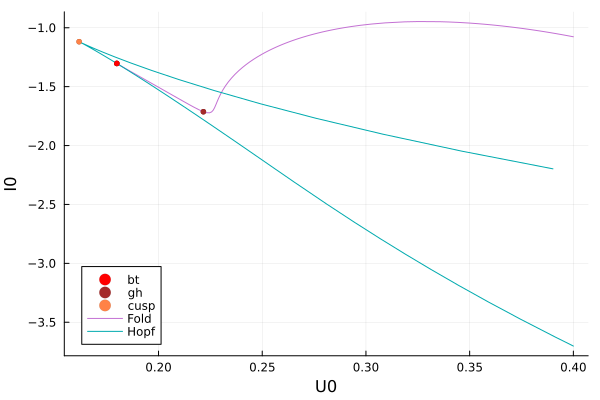

In [11]:
plot(hp_codim2_1, sn_codim2_1, branchlabel = ["Fold", "Hopf"])

In [12]:
"""jldsave("hp_codim2_1.jld2"; hp_codim2_1.I0, hp_codim2_1.U0)
jldsave("sn_codim2_1.jld2"; sn_codim2_1.I0, sn_codim2_1.U0)"""

"jldsave(\"hp_codim2_1.jld2\"; hp_codim2_1.I0, hp_codim2_1.U0)\njldsave(\"sn_codim2_1.jld2\"; sn_codim2_1.I0, sn_codim2_1.U0)"